Impor perkakas penting.

In [29]:
from io import StringIO
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('complaints.csv')

/home/backend/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Constant.

In [31]:
NUM_WORDS = 5000
OOV = 'oov'
EMBEDDING_DIMENSION = 32
MAXIMUM_SEQUENCE_LENGTH = 64
NUMBER_OF_OBSERVATIONS = 100000
NUMBER_OF_EPOCHS = 20
PERCENTAGE_OF_TEST_DATA = 0.2
SEED=17

Tampilan awal data.

In [32]:
print(data)

        Date received                                            Product  \
0          2019-06-13  Credit reporting, credit repair services, or o...   
1          2019-04-01  Credit reporting, credit repair services, or o...   
2          2021-05-21  Credit reporting, credit repair services, or o...   
3          2019-08-01  Credit reporting, credit repair services, or o...   
4          2019-07-16  Credit reporting, credit repair services, or o...   
...               ...                                                ...   
2123098    2017-02-09                                    Debt collection   
2123099    2015-04-29                                           Mortgage   
2123100    2017-03-31                                   Credit reporting   
2123101    2017-01-16                                   Credit reporting   
2123102    2018-03-07                                           Mortgage   

                         Sub-product  \
0                   Credit reporting   
1      

In [33]:
print(data.head())

  Date received                                            Product  \
0    2019-06-13  Credit reporting, credit repair services, or o...   
1    2019-04-01  Credit reporting, credit repair services, or o...   
2    2021-05-21  Credit reporting, credit repair services, or o...   
3    2019-08-01  Credit reporting, credit repair services, or o...   
4    2019-07-16  Credit reporting, credit repair services, or o...   

        Sub-product                                              Issue  \
0  Credit reporting               Incorrect information on your report   
1  Credit reporting               Incorrect information on your report   
2  Credit reporting  Problem with a credit reporting company's inve...   
3  Credit reporting  Problem with a credit reporting company's inve...   
4  Credit reporting  Credit monitoring or identity theft protection...   

                                           Sub-issue  \
0                Information belongs to someone else   
1                     

Berdasarkan tampilan data diatas, tidak semua kolom yang digunakan. Pada tugas ini saya hanya menggunakan kolom:
1. Consumer complaint narrative.

In [34]:
col = ['Product', 'Consumer complaint narrative']
data = data[col]
data = data[pd.notnull(data['Consumer complaint narrative'])]
data.columns = ['Product', 'Consumer_complaint_narrative']
data['target'] = data['Product'].factorize()[0]
category_id_df = data[['Product', 'target']].drop_duplicates().sort_values('target')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['target', 'Product']].values)
data.head()

,Product,Consumer_complaint_narrative,target
3,"Credit reporting, credit repair services, or o...","Hi, for the past 4 months I've been going back...",0
4,"Credit reporting, credit repair services, or o...",Experian has a Score Boost feature that promis...,0
5,Credit card or prepaid card,On XX/XX/2019 Netspend is currently my trusted...,1
6,Checking or savings account,This is a continuation of complaint # XXXX. \n...,2
7,"Credit reporting, credit repair services, or o...",ATTACHED TO THIS COMPLAINT IS A IDENTITY THEFT...,0


In [35]:
data.head()

,Product,Consumer_complaint_narrative,target
3,"Credit reporting, credit repair services, or o...","Hi, for the past 4 months I've been going back...",0
4,"Credit reporting, credit repair services, or o...",Experian has a Score Boost feature that promis...,0
5,Credit card or prepaid card,On XX/XX/2019 Netspend is currently my trusted...,1
6,Checking or savings account,This is a continuation of complaint # XXXX. \n...,2
7,"Credit reporting, credit repair services, or o...",ATTACHED TO THIS COMPLAINT IS A IDENTITY THEFT...,0


In [36]:
print('Jumlah observasi: ',len(data))
print('Jumlah target: ', len(data['target'].unique()))
print('Keterangan target: ', data['target'].unique())

Jumlah observasi:  730875
Jumlah target:  18
Keterangan target:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


Kolom target diperoleh dari kolom product. Setelah didapatkan, maka kolom product bisa di drop.

In [37]:
del data['Product']
print(data)

                              Consumer_complaint_narrative  target
3        Hi, for the past 4 months I've been going back...       0
4        Experian has a Score Boost feature that promis...       0
5        On XX/XX/2019 Netspend is currently my trusted...       1
6        This is a continuation of complaint # XXXX. \n...       2
7        ATTACHED TO THIS COMPLAINT IS A IDENTITY THEFT...       0
...                                                    ...     ...
2123097  Automated calls from " XXXX with Capital One '...      11
2123098  I have disputed my debts several times with no...       6
2123099  My father died in XX/XX/XXXX. Left me his only...       5
2123100  cfbp i would Like to file a complaint on Exper...       9
2123101  My husband and I are in the middle of an FHA S...       9

[730875 rows x 2 columns]


Memori komputer saya diduga tidak cukup untuk proses 730875 observasi. Oleh karena itu, saya ambil cukup 5000 observasi pertama saja.

In [38]:
data = data.head(NUMBER_OF_OBSERVATIONS)
print(data)
print('Target class: ', data.target.unique())

                             Consumer_complaint_narrative  target
3       Hi, for the past 4 months I've been going back...       0
4       Experian has a Score Boost feature that promis...       0
5       On XX/XX/2019 Netspend is currently my trusted...       1
6       This is a continuation of complaint # XXXX. \n...       2
7       ATTACHED TO THIS COMPLAINT IS A IDENTITY THEFT...       0
...                                                   ...     ...
190109  I received a request from Discover Card of whi...       1
190112  This kind of account is placed as a charged of...       6
190113  I wrote everything up and saved it as a PDF - ...       0
190114  I submitted a mobile deposit through Fifth Thi...       2
190115  My dad passed and was faced with financial dif...       0

[100000 rows x 2 columns]
Target class:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


**Text Preprocessing.**

In [39]:
data['Consumer_complaint_narrative'] = data['Consumer_complaint_narrative'].str.lower()
print(data)

                             Consumer_complaint_narrative  target
3       hi, for the past 4 months i've been going back...       0
4       experian has a score boost feature that promis...       0
5       on xx/xx/2019 netspend is currently my trusted...       1
6       this is a continuation of complaint # xxxx. \n...       2
7       attached to this complaint is a identity theft...       0
...                                                   ...     ...
190109  i received a request from discover card of whi...       1
190112  this kind of account is placed as a charged of...       6
190113  i wrote everything up and saved it as a pdf - ...       0
190114  i submitted a mobile deposit through fifth thi...       2
190115  my dad passed and was faced with financial dif...       0

[100000 rows x 2 columns]


In [40]:
# Convert consumer_complaint_narrative into a proper vector space
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV)
f_head = np.array(data['Consumer_complaint_narrative'])
tokenizer.fit_on_texts(f_head)
data['sequences'] = data.Consumer_complaint_narrative.apply(lambda x: tokenizer.texts_to_sequences([x]))
data.head()

,Consumer_complaint_narrative,target,sequences
3,"hi, for the past 4 months i've been going back...",0,"[[1893, 21, 3, 227, 241, 167, 386, 38, 260, 83..."
4,experian has a score boost feature that promis...,0,"[[201, 41, 8, 195, 3851, 3045, 11, 3032, 5, 14..."
5,on xx/xx/2019 netspend is currently my trusted...,1,"[[13, 10, 10, 89, 2895, 20, 589, 7, 3307, 55, ..."
6,this is a continuation of complaint # xxxx. \n...,2,"[[15, 20, 8, 1, 9, 141, 2, 61, 477, 5, 1073, 1..."
7,attached to this complaint is a identity theft...,0,"[[218, 5, 15, 141, 20, 8, 119, 136, 390, 31, 2..."


In [41]:
# Padding.
datanya = np.array([[1,2,3],[4,5]])
dataku = data['sequences'].values

seq_list = list()
for row in data['sequences'].values:
    seq_list.append(row[0])

data['padded_sequences'] = list(pad_sequences(seq_list, maxlen=MAXIMUM_SEQUENCE_LENGTH, padding='post', truncating='post'))
print(data)

/home/backend/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


                             Consumer_complaint_narrative  target  \
3       hi, for the past 4 months i've been going back...       0   
4       experian has a score boost feature that promis...       0   
5       on xx/xx/2019 netspend is currently my trusted...       1   
6       this is a continuation of complaint # xxxx. \n...       2   
7       attached to this complaint is a identity theft...       0   
...                                                   ...     ...   
190109  i received a request from discover card of whi...       1   
190112  this kind of account is placed as a charged of...       6   
190113  i wrote everything up and saved it as a pdf - ...       0   
190114  i submitted a mobile deposit through fifth thi...       2   
190115  my dad passed and was faced with financial dif...       0   

                                                sequences  \
3       [[1893, 21, 3, 227, 241, 167, 386, 38, 260, 83...   
4       [[201, 41, 8, 195, 3851, 3045, 11, 3032, 

In [42]:
data.head()

,Consumer_complaint_narrative,target,sequences,padded_sequences
3,"hi, for the past 4 months i've been going back...",0,"[[1893, 21, 3, 227, 241, 167, 386, 38, 260, 83...","[1893, 21, 3, 227, 241, 167, 386, 38, 260, 83,..."
4,experian has a score boost feature that promis...,0,"[[201, 41, 8, 195, 3851, 3045, 11, 3032, 5, 14...","[201, 41, 8, 195, 3851, 3045, 11, 3032, 5, 147..."
5,on xx/xx/2019 netspend is currently my trusted...,1,"[[13, 10, 10, 89, 2895, 20, 589, 7, 3307, 55, ...","[13, 10, 10, 89, 2895, 20, 589, 7, 3307, 55, 6..."
6,this is a continuation of complaint # xxxx. \n...,2,"[[15, 20, 8, 1, 9, 141, 2, 61, 477, 5, 1073, 1...","[15, 20, 8, 1, 9, 141, 2, 61, 477, 5, 1073, 15..."
7,attached to this complaint is a identity theft...,0,"[[218, 5, 15, 141, 20, 8, 119, 136, 390, 31, 2...","[218, 5, 15, 141, 20, 8, 119, 136, 390, 31, 27..."


**Data split into data training and testing.**

In [43]:
print(pd.get_dummies(data['target']).values)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(data['padded_sequences'].values, 
                                                    pd.get_dummies(data['target']).values, 
                                                    test_size=PERCENTAGE_OF_TEST_DATA, 
                                                    shuffle=True, 
                                                    random_state=SEED)

In [45]:
# Array reshape into a tensor.
def XTensorReshape(input_tensor):    
    results_tensor = None
    for x in input_tensor:
        if(results_tensor is None):
            results_tensor = x
        else:
            results_tensor = np.vstack((results_tensor,x))
    return results_tensor.reshape((results_tensor.shape[0],results_tensor.shape[1]))

In [46]:
x_train = XTensorReshape(X_train)
x_test = XTensorReshape(X_test)

print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(20000, 64)
(80000, 64)
(80000, 17)
(20000, 17)


**Neural Network**

In [47]:
early_stopping = EarlyStopping(
    monitor='accuracy', 
    patience=3, 
    mode='max'
)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIMENSION, input_length=MAXIMUM_SEQUENCE_LENGTH),
    tf.keras.layers.LSTM(EMBEDDING_DIMENSION, return_sequences=True),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(y_test.shape[1], activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 32)            160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64, 32)            8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64, 20)            660       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                21777     
Total params: 190,757
Trainable params: 190,757
Non-trainable params: 0
_________________________________________________________________


Tensorflow training and evaluation.

In [49]:
riwayat_latihan = model.fit(x_train, 
                              y_train, 
                              epochs=NUMBER_OF_EPOCHS,
                              callbacks=[early_stopping],
                            validation_split=0.2)
hasil_evaluasi = model.evaluate(x_test, y_test, verbose=False)
print(f'Hasil evaluasi - Loss: {hasil_evaluasi[0]} - Accuracy: {100*hasil_evaluasi[1]}%')

Epoch 1/20
2000/2000 [==============================] - 32s 15ms/step - loss: 1.0964 - accuracy: 0.6362 - val_loss: 0.6287 - val_accuracy: 0.8008
Epoch 2/20
2000/2000 [==============================] - 34s 17ms/step - loss: 0.5605 - accuracy: 0.8205 - val_loss: 0.6035 - val_accuracy: 0.8035
Epoch 3/20
2000/2000 [==============================] - 32s 16ms/step - loss: 0.4978 - accuracy: 0.8391 - val_loss: 0.5842 - val_accuracy: 0.8106
Epoch 4/20
2000/2000 [==============================] - 34s 17ms/step - loss: 0.4478 - accuracy: 0.8539 - val_loss: 0.5884 - val_accuracy: 0.8133
Epoch 5/20
2000/2000 [==============================] - 35s 17ms/step - loss: 0.3997 - accuracy: 0.8682 - val_loss: 0.6003 - val_accuracy: 0.8132
Epoch 6/20
2000/2000 [==============================] - 31s 15ms/step - loss: 0.3551 - accuracy: 0.8828 - val_loss: 0.6515 - val_accuracy: 0.8074
Epoch 7/20
2000/2000 [==============================] - 31s 15ms/step - loss: 0.3168 - accuracy: 0.8936 - val_loss: 0.6676 -

**Plotting Function**

In [50]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

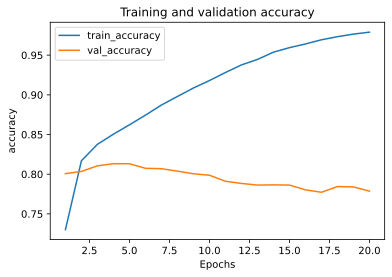

In [51]:
plot_metric(riwayat_latihan, 'accuracy')